In [21]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('PriceRangeofHDBFlatsOffered.csv')

# Display the first few rows of the dataframe
print(df.head())

   financial_year         town room_type min_selling_price max_selling_price  \
0            2008      Punggol    2-room             82000            107000   
1            2008      Punggol    3-room            135000            211000   
2            2008      Punggol    4-room            223000            327000   
3            2008      Punggol    5-room            305000            428000   
4            2008  Jurong West    3-room            142000            160000   

  min_selling_price_less_ahg_shg max_selling_price_less_ahg_shg  
0                              0                              0  
1                              0                              0  
2                              0                              0  
3                              0                              0  
4                              0                              0  


In [22]:
# Basic information
print("DataFrame Info:")
print(df.info())

# Data types of each column
print("\nData Types:")
df.dtypes

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   financial_year                  333 non-null    int64 
 1   town                            333 non-null    object
 2   room_type                       333 non-null    object
 3   min_selling_price               333 non-null    object
 4   max_selling_price               333 non-null    object
 5   min_selling_price_less_ahg_shg  333 non-null    object
 6   max_selling_price_less_ahg_shg  333 non-null    object
dtypes: int64(1), object(6)
memory usage: 18.3+ KB
None

Data Types:


financial_year                     int64
town                              object
room_type                         object
min_selling_price                 object
max_selling_price                 object
min_selling_price_less_ahg_shg    object
max_selling_price_less_ahg_shg    object
dtype: object

In [23]:
# Create a new attribute 'average_price'
df['min_selling_price'] = pd.to_numeric(df['min_selling_price'], errors='coerce')
df['max_selling_price'] = pd.to_numeric(df['max_selling_price'], errors='coerce')


# Remove rows where min_selling_price or max_selling_price are 0 or NaN
df = df[(df['min_selling_price'] > 0) & (df['max_selling_price'] > 0)]


df['average_price'] = (df['min_selling_price'] + df['max_selling_price']) / 2

#drop the min_selling_price and max_selling_price columns after calculation average_price
df = df.drop(columns=['min_selling_price', 'max_selling_price'])

# Display the first few rows to verify the new attribute
df

,financial_year,town,room_type,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg,average_price
0,2008,Punggol,2-room,0,0,94500.0
1,2008,Punggol,3-room,0,0,173000.0
2,2008,Punggol,4-room,0,0,275000.0
3,2008,Punggol,5-room,0,0,366500.0
4,2008,Jurong West,3-room,0,0,151000.0
...,...,...,...,...,...,...
328,2023,Tengah,5-room,409000,562000,530500.0
329,2023,Woodlands,2-room,39000,151000,175000.0
330,2023,Woodlands,3-room,148000,270000,284000.0
331,2023,Woodlands,4-room,243000,408000,385500.0


In [24]:
#drop the min_selling_price_less_ahg_shg and max_selling_price_less_ahg_shg columns that are 0
df['min_selling_price_less_ahg_shg'] = pd.to_numeric(df['min_selling_price_less_ahg_shg'], errors='coerce')
df['max_selling_price_less_ahg_shg'] = pd.to_numeric(df['max_selling_price_less_ahg_shg'], errors='coerce')

df = df[(df['min_selling_price_less_ahg_shg'] > 0) & (df['max_selling_price_less_ahg_shg'] > 0)]

df

,financial_year,town,room_type,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg,average_price
36,2010,Punggol,3-room,120000,207000,193500.0
37,2010,Punggol,4-room,233000,366000,309500.0
38,2010,Punggol,5-room,330000,458001,394000.0
39,2010,Jurong West,3-room,138000,169000,183500.0
40,2010,Jurong West,4-room,229000,315000,282000.0
...,...,...,...,...,...,...
328,2023,Tengah,5-room,409000,562000,530500.0
329,2023,Woodlands,2-room,39000,151000,175000.0
330,2023,Woodlands,3-room,148000,270000,284000.0
331,2023,Woodlands,4-room,243000,408000,385500.0


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Standardize 'town' values by stripping whitespace and converting to lowercase
df['town'] = df['town'].str.strip().str.lower()

# Encode the 'town' attribute as numerical classes
label_encoder = LabelEncoder()
df['town'] = label_encoder.fit_transform(df['town'])


# Remove "-room" from 'room_type' and convert to integer, handling errors
def clean_room_type(value):
    try:
        return int(value.replace('-room', ''))
    except:
        return None

df['room_type'] = df['room_type'].apply(clean_room_type)

# Drop rows with invalid room_type values
df = df.dropna(subset=['room_type'])

C:\Users\Hean\AppData\Local\Temp\ipykernel_33316\34915817.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['town'] = df['town'].str.strip().str.lower()
C:\Users\Hean\AppData\Local\Temp\ipykernel_33316\34915817.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['town'] = label_encoder.fit_transform(df['town'])
C:\Users\Hean\AppData\Local\Temp\ipykernel_33316\34915817.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [26]:
# Display the entire dataframe
df

,financial_year,town,room_type,min_selling_price_less_ahg_shg,max_selling_price_less_ahg_shg,average_price
36,2010,6,3,120000,207000,193500.0
37,2010,6,4,233000,366000,309500.0
38,2010,6,5,330000,458001,394000.0
39,2010,5,3,138000,169000,183500.0
40,2010,5,4,229000,315000,282000.0
...,...,...,...,...,...,...
328,2023,9,5,409000,562000,530500.0
329,2023,10,2,39000,151000,175000.0
330,2023,10,3,148000,270000,284000.0
331,2023,10,4,243000,408000,385500.0


In [27]:
#reset pandas display options
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

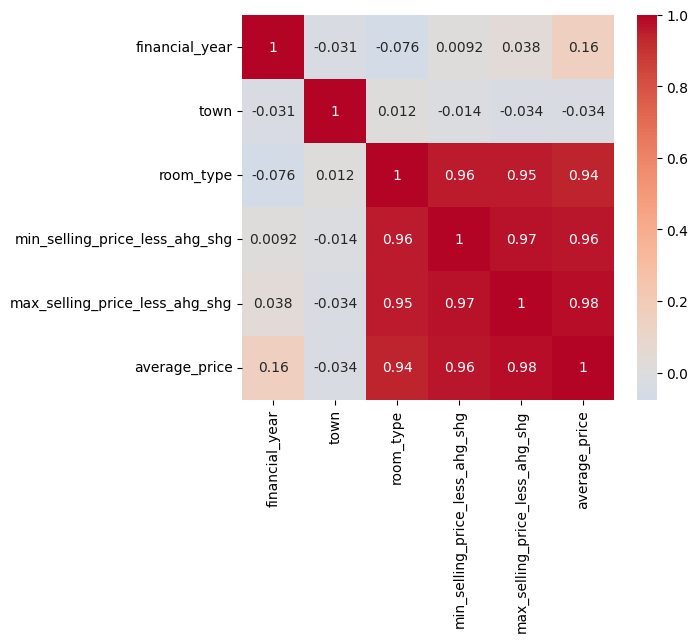

In [28]:
# Calculate the Spearman correlation matrix
spearman_corr = df.corr(method='spearman')

# Set up the matplotlib figure
plt.figure(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0)

# Display the heatmap (our target variable is 'average_price')
plt.show()

In [29]:
#drop the town column
# df = df.drop(columns=['town'])
df = df.drop(columns=['min_selling_price_less_ahg_shg', 'max_selling_price_less_ahg_shg'])

In [30]:
df

,financial_year,town,room_type,average_price
36,2010,6,3,193500.0
37,2010,6,4,309500.0
38,2010,6,5,394000.0
39,2010,5,3,183500.0
40,2010,5,4,282000.0
...,...,...,...,...
328,2023,9,5,530500.0
329,2023,10,2,175000.0
330,2023,10,3,284000.0
331,2023,10,4,385500.0


In [31]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score, make_scorer


# Identify input features (X) and target variable (y)
X = df.drop(columns=['average_price'])
y = df['average_price']

# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.10, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Define a custom scorer for MAPE
def mape(y_true, y_pred):
    return (100 * (abs(y_true - y_pred) / y_true)).mean()

mape_scorer = make_scorer(mape, greater_is_better=False)

# Perform Recursive Feature Elimination (RFE) with cross-validation
linear_model = LinearRegression()
rfe = RFE(estimator=linear_model, n_features_to_select=9)
X_rfe = rfe.fit_transform(X_train, y_train)

# Perform cross-validation with Ridge regression
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring=mape_scorer)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the testing data
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
mape_score = mape(y_test, y_pred_test)


print(f"Best Ridge Model Alpha: {grid_search.best_params_['alpha']}")
print(f"Cross-validated Mean Absolute Error (MAE): {mae}")
print(f"Cross-validated R-squared (R²): {r2}")
print(f"Cross-validated Mean Absolute Percentage Error (MAPE): {mape_score}%")

X_train shape: (226, 9)
X_test shape: (28, 9)
y_train shape: (226,)
y_test shape: (28,)
Best Ridge Model Alpha: 100.0
Cross-validated Mean Absolute Error (MAE): 71829.90987749353
Cross-validated R-squared (R²): 0.2639339371098023
Cross-validated Mean Absolute Percentage Error (MAPE): 34.02545702099182%


In [41]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib


def evaluate_model(predictions, actual):
    mae = mean_absolute_error(actual, predictions)
    mape = (100 * (np.abs(actual - predictions) / actual)).mean()
    return mae, mape


# Stack the initial predictions as a new feature for input to the Random Forest model
X_stacked = y_pred_test.reshape(-1, 1)

# Call the Random Forest Regressor model
rf_model = RandomForestRegressor()

print("training Random Forest")
rf_model.fit(X_stacked, y_test.to_numpy())

# Obtain new predictions using the Random Forest model, using the stacked features
rfr_predictions = rf_model.predict(X_stacked)

# Evaluate Random Forest Regressor
rfr_mae, rfr_mape = evaluate_model(rfr_predictions, y_test)
print(f"Random Forest Regressor - MAE: {rfr_mae}, MAPE: {rfr_mape}")


# Save the best Random Forest model to a file
joblib.dump(rf_model, 'best_rf_model.pkl')

training Random Forest
Random Forest Regressor - MAE: 14221.42857142857, MAPE: 6.315534012063325


['best_rf_model.pkl']

In [42]:
#full prediction phase on validation set

# Ridge regression model prediction
y_pred_val = best_model.predict(X_val)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
mape_score = mape(y_val, y_pred_val)


print(f"Best Ridge Model Alpha: {grid_search.best_params_['alpha']}")
print(f"Cross-validated Mean Absolute Error (MAE): {mae}")
print(f"Cross-validated R-squared (R²): {r2}")
print(f"Cross-validated Mean Absolute Percentage Error (MAPE): {mape_score}%")


new_input = y_pred_val.reshape(-1, 1)


# Obtain new predictions using the Random Forest model, using the stacked features
rfr_predictions = rf_model.predict(new_input)

# Evaluate Random Forest Regressor
rfr_mae, rfr_mape = evaluate_model(rfr_predictions, y_val)
print(f"Random Forest Regressor - MAE: {rfr_mae}, MAPE: {rfr_mape}")

Best Ridge Model Alpha: 100.0
Cross-validated Mean Absolute Error (MAE): 93001.24097925721
Cross-validated R-squared (R²): -0.14341971383839058
Cross-validated Mean Absolute Percentage Error (MAPE): 44.10829310656811%
Random Forest Regressor - MAE: 48523.269230769234, MAPE: 22.539941223003282


In [69]:
# Function to get user input and make predictions
def get_user_input_and_predict(ridge_model, rfr_model, poly, scaler, label_encoder):
    # Get user input
    user_input = input("Enter the feature values (financial_year, town, room_type) separated by commas: ")
    
    # Parse the input
    try:
        financial_year, town_name, room_type = user_input.split(',')
        financial_year = float(financial_year)
        room_type = int(room_type.replace('-room', '').strip())
        
        # Convert town name to its numeric class
        if town_name.strip() not in label_encoder.classes_:
            raise ValueError(f"Town '{town_name.strip()}' is not recognized. Valid options: {', '.join(label_encoder.classes_)}")
        town_id = label_encoder.transform([town_name.strip()])[0]
        
        # Combine the features
        user_input_array = np.array([[financial_year, town_id, room_type]])
        
        # Process the input
        user_input_poly = poly.transform(user_input_array)
        user_input_scaled = scaler.transform(user_input_poly)
        
        # Make prediction with the Ridge model
        ridge_prediction = ridge_model.predict(user_input_scaled).reshape(-1, 1)
        final_prediction = rfr_model.predict(ridge_prediction)
        
        return final_prediction
    
    except ValueError as e:
        print(f"Input error: {e}")
        return None

# Example usage
user_prediction = get_user_input_and_predict(best_model, rf_model, poly, scaler, label_encoder)
if user_prediction is not None:
    print(f"Final predicted average price for user input: {user_prediction[0]}")

Final predicted average price for user input: 387520.0


e:\coding files\SVM-BTO-Prices\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
